In [2]:
from specializeGraph import *
import numpy as np
from scipy import linalg as la

In [2]:
L = laplacian(randomGraph(6,base=0))


In [3]:
la.eigvals(L)

array([0.+0.00000000e+00j, 3.+0.00000000e+00j, 6.+0.00000000e+00j,
       4.+0.00000000e+00j, 5.+2.13630727e-08j, 5.-2.13630727e-08j])

In [4]:
la.det(L[[1,2,4,5]][:,[1,2,4,5]])

72.0

In [5]:
e,v = la.eig(L)
print(e[0],v[0])

(0j, array([-4.08248290e-01+0.00000000e+00j,  2.87868365e-16+0.00000000e+00j,
        3.92232270e-01+0.00000000e+00j,  6.99580436e-17+0.00000000e+00j,
       -3.42997170e-01-3.66373674e-09j, -3.42997170e-01+3.66373674e-09j]))


In [6]:
L

array([[ 5., -1., -1., -1., -1., -1.],
       [-1.,  3.,  0., -1.,  0., -1.],
       [-1.,  0.,  3., -1., -1.,  0.],
       [-1., -1., -1.,  5., -1., -1.],
       [ 0., -1., -1.,  0.,  3., -1.],
       [ 0., -1., -1., -1., -1.,  4.]])

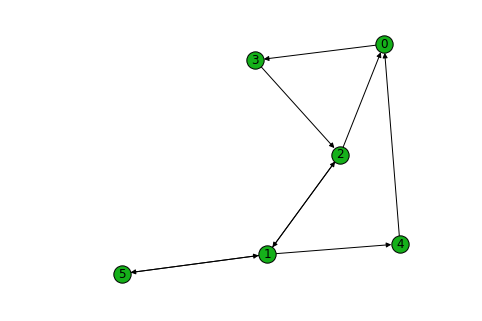

[0, 2, 1]


In [11]:
G,b = stableSpeci(5)
drawGraph(specializeGraph(G,b))
print(b)

In [12]:
print(laplacian(G))
print(laplacian(specializeGraph(G,b)))

[[ 2. -1.  0. -1.  0.]
 [ 0.  2. -1.  0. -1.]
 [ 0. -1.  2. -1.  0.]
 [ 0.  0. -1.  1.  0.]
 [-1.  0.  0.  0.  1.]]
[[ 2.  0. -1.  0. -1.  0.]
 [ 0.  2. -1.  0.  0. -1.]
 [ 0. -1.  2. -1.  0.  0.]
 [-1.  0.  0.  1.  0.  0.]
 [ 0. -1.  0.  0.  1.  0.]
 [ 0. -1.  0.  0.  0.  1.]]


In [13]:
np.random.randint(1,5)

1

We find that if we add 1 to the diagonal of a laplacian, it becomes invertible. Amazing!

In [16]:
howMany = 200
n = 4
for j in range(howMany):
    G = randomGraph(n,base=0)
    if nx.is_strongly_connected(nx.DiGraph(G)):
        i = np.random.randint(0,n)
        D = np.zeros((n,n))
        D[i,i] = 1
        if np.isclose(la.det(laplacian(G)+D),0):
            drawGraph(G)
            print(la.eig(laplacian(G))[1])

In [17]:
la.inv(laplacian(G)+D)

array([[1.5  , 1.   , 0.5  , 1.   ],
       [0.875, 1.   , 0.375, 0.75 ],
       [1.   , 1.   , 1.   , 1.   ],
       [1.125, 1.   , 0.625, 1.25 ]])

In [18]:
print(laplacian(G),D)

(array([[ 2., -1.,  0., -1.],
       [-1.,  2.,  0., -1.],
       [ 0., -1.,  2., -1.],
       [-1., -1., -1.,  3.]]), array([[0., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]]))


In [19]:
G

array([[0., 1., 0., 1.],
       [1., 0., 0., 1.],
       [0., 1., 0., 1.],
       [1., 1., 1., 0.]])

In [34]:
A = np.array([[0,0,1,0,0,0],
              [0,0,0,1,0,0],
              [0,0,0,0,1,0],
              [0,0,0,0,0,1],
              [1,0,0,0,0,1],
              [0,1,0,0,1,0]])

sA = specializeGraph(A,[0,1,2,3])
print(eigCent(A))
print(eigCent(sA))

[1.        +0.j 1.        +0.j 1.46557123+0.j 1.46557123+0.j
 2.14789904+0.j 2.14789904+0.j]
[1.        +0.j 1.        +0.j 1.46557123+0.j 1.46557123+0.j
 1.27674228+0.j 0.87115676+0.j 1.27674228+0.j 0.87115676+0.j
 0.87115676+0.j 1.27674228+0.j 0.87115676+0.j 1.27674228+0.j]


In [38]:
A = np.array([[0,1,0,0],
              [1,0,0,1],
              [1,0,0,1],
              [1,0,1,0]
             ])
eigCent(A)

array([1.        , 1.61803399, 1.61803399, 1.61803399])

In [4]:
def eigCent(A):
    lam,V = la.eig(A)
    v = V[:,np.argmax(lam)]
    v = v*(1./v[0])
    return v

Check if the first entries stay the same

In [32]:
for i in range(100):
    G,base = randomGraph(5,stronglyCon=1)
    sG = specializeGraph(G,base)
    rho = spectralRad(G)
    v = eigCent(G)


array([[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]])

In [35]:
for i in range(100):
    G = randomGraph(10,base=0)
    C,base = randomGraph(5,stronglyCon=1)
    G[5:,5:] = C
    rho = spectralRad(G)
    if la.det(rho*np.eye(5)-C)

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 0]])

In [28]:
A = np.array([[0,0,0,0,0],
              [0,0,1,0,0],
              [1,0,0,1,1],
              [0,0,1,0,1],
              [1,0,1,0,0]])


sA = specializeGraph(A,[0,1])
print(eigCent(A))
print(eigCent(sA))

[nan inf inf inf inf]
[nan inf nan nan nan inf inf inf]


In [29]:
np.round(la.eig(A)[1],2),np.round(la.eig(A)[0],2)

(array([[ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
        [ 1.  , -0.6 ,  0.37,  0.58,  1.  ],
        [ 0.  ,  0.37,  0.6 , -0.58, -0.  ],
        [ 0.  ,  0.37,  0.6 , -0.  , -0.  ],
        [ 0.  , -0.6 ,  0.37,  0.58,  0.  ]]),
 array([ 0.  +0.j, -0.62+0.j,  1.62+0.j, -1.  +0.j,  0.  +0.j]))

In [30]:
np.round(la.eig(sA)[1],2),np.round(la.eig(sA)[0],2)

(array([[ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
        [ 1.  , -0.6 ,  0.37, -0.43, -0.58,  0.71,  0.58,  1.  ],
        [ 0.  ,  0.  ,  0.  , -0.57,  0.58, -0.3 ,  0.  ,  0.  ],
        [ 0.  ,  0.  ,  0.  , -0.57, -0.  , -0.3 ,  0.  , -0.  ],
        [ 0.  ,  0.  ,  0.  , -0.35, -0.58,  0.48, -0.  , -0.  ],
        [ 0.  ,  0.37,  0.6 , -0.12, -0.  , -0.14, -0.58, -0.  ],
        [ 0.  ,  0.37,  0.6 , -0.12, -0.  , -0.14,  0.  , -0.  ],
        [ 0.  , -0.6 ,  0.37, -0.07,  0.  ,  0.22,  0.58,  0.  ]]),
 array([ 0.  +0.j, -0.62+0.j,  1.62+0.j,  1.62+0.j, -1.  +0.j, -0.62+0.j,
        -1.  +0.j,  0.  +0.j]))